In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='ticks', context='paper')

/Users/yoavram/miniconda3/envs/simarba/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [49]:
def simulation(N=100, n=100, η=0.1, ω1=1, ω2=0, π0=0.5, ϵ=None):
    """Run a single simulation.
    
    Parameters
    ----------
    N : int
        constant population size
    n : int
        number of generations
    η : float
        learning rate, 0 <= η <= 1
    ω1, ω2 : float
        two fitness values for the two phenotyes in the two environments, ω > 0
    π0 : float
        initial value for π
    ϵ : numpy.ndarray
        ϵ[t] is the environment at time t
    """
    ω = np.eye(2)
    ω = np.array(
        [
            [ω1, ω2],
            [ω2, ω1]
        ],
    dtype=float)
    
    if ϵ is None:
        ϵ = np.random.randint(0, 2, n)
    # π[t, i] is the probability for phenotype 0 at individual i at time t
    π = np.zeros((n, N), dtype=float)
    π[0, :] = np.random.normal(π0, np.sqrt(π0 / 10), N)
    π[0, π[0, :] < 0] = 0
    π[0, π[0, :] > 1] = 1

    for t in range(n - 1):
        # phenotype of each individual
        φ = np.zeros(N, dtype=int)
        φ[np.random.random(N) > π[t, :]] = 1
        # fitness of each invidividual in current environment
        ω_t = ω[ϵ[t], φ]
        ω_t = ω_t / ω_t.sum()
        # selection & reproduction; idx is the indexes of reproducing individuals
        idx = np.random.choice(N, N, True, ω_t)
        # offspring phenotype probability
        π[t + 1, :] = (1 - η) * π[t, idx] + η * (φ[idx] == 0)
    return π

π = simulation()
print(0)
print("Initial π: {:.2f}+-{:.4f}\nFinal π: {:.2f}+-{:.4f}".format(
    π[0,:].mean(), π[0,:].std(), π[-1,:].mean(), π[-1,:].std()
))

0
Initial π: 0.51+-0.2006
Final π: 0.65+-0.0000


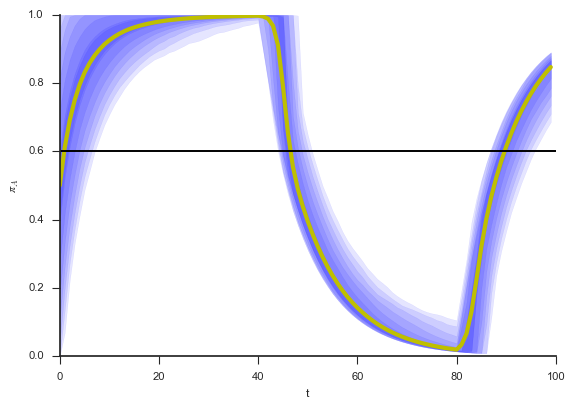

In [84]:
def πplot(π, ϵ, ax=None):    
    if ax is None:
        fig, ax = plt.subplots()
    for i in range(8):
        low, high = np.percentile(π, [0.5*(2**i), 100-0.5*(2**i)], 1)
        ax.fill_between(range(π.shape[0]), low, high, color='b', alpha=0.1)
    ax.plot(π.mean(axis=1), c='y', lw=3)
    ax.axhline((ϵ==0).mean(), color='k')
    ax.set(
        ylim=(0, 1),
        ylabel='$π_A$',
        xlabel='t'
    )
    ax.set_clip_on(False)
    sns.despine()
    
πplot(π, ϵ)

# Figure 2

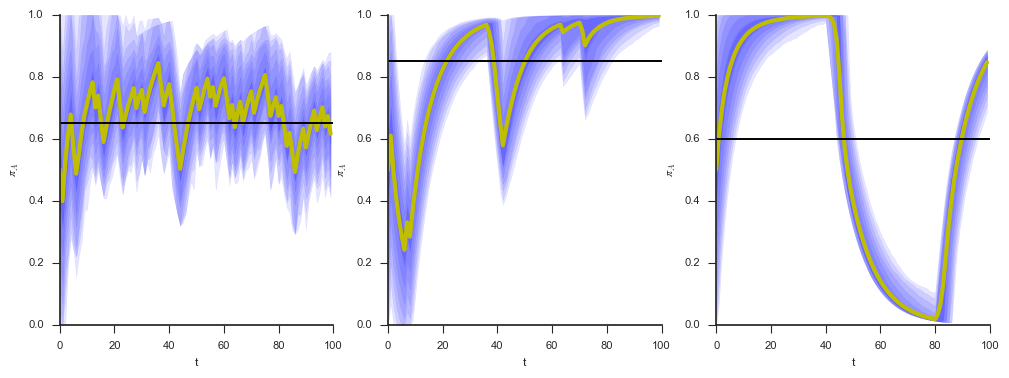

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

## Fig. 2A
ϵ = np.random.choice(2, 100, True, [0.7, 0.3])
π = simulation(N=1000, n=100, η=0.1, ω1=2.0, ω2=0.2, π0=0.5, ϵ=ϵ)
πplot(π, ϵ, ax=ax[0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π = simulation(N=100000, n=100, η=0.1, ω1=2.0, ω2=0.2, π0=0.5, ϵ=ϵ)
πplot(π, ϵ, ax=ax[1])

## Fig. 2C
ϵ = np.array([0] * 40 + [1] * 40 + [0] * 20)
π = simulation(N=100000, n=100, η=0.1, ω1=2.0, ω2=0.2, π0=0.5, ϵ=ϵ)
πplot(π, ϵ, ax=ax[2])